In [73]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [203]:
import glob
fs = glob.glob('./city2016/china_cities_*.csv')
fs2 = glob.glob('./city2015/china_cities_*.csv')

In [204]:
df = pandas.DataFrame()
for f in fs + fs2:
    df2 = pandas.read_csv(f)
    df = df.append(df2)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252420 entries, 0 to 359
Columns: 370 entries, date to 丹东
dtypes: float64(367), int64(2), object(1)
memory usage: 714.5+ MB


In [208]:
df.head(10)

,date,hour,type,北京,天津,石家庄,唐山,秦皇岛,邯郸,保定,...,五家渠,克州,普洱,襄阳,葫芦岛,河源,揭阳,辽阳,朝阳,丹东
0,20160419,0,AQI,60.0,71.0,65.0,57.0,46.0,68.0,66.0,...,56.0,61.0,63.0,55.0,43.0,46.0,43.0,71.0,53.0,66.0
1,20160419,0,PM2.5,34.0,33.0,27.0,36.0,24.0,38.0,39.0,...,22.0,8.0,40.0,15.0,30.0,23.0,30.0,48.0,36.0,39.0
2,20160419,0,PM2.5_24h,18.0,19.0,17.0,23.0,15.0,24.0,17.0,...,23.0,118.0,25.0,34.0,26.0,12.0,19.0,35.0,29.0,33.0
3,20160419,0,PM10,68.0,90.0,77.0,62.0,45.0,83.0,79.0,...,60.0,30.0,73.0,38.0,33.0,45.0,36.0,89.0,41.0,80.0
4,20160419,0,PM10_24h,37.0,55.0,61.0,56.0,38.0,84.0,52.0,...,86.0,507.0,70.0,61.0,51.0,22.0,32.0,83.0,48.0,80.0
5,20160419,0,SO2,4.0,16.0,24.0,26.0,8.0,23.0,21.0,...,26.0,3.0,10.0,9.0,14.0,5.0,7.0,18.0,11.0,13.0
6,20160419,0,SO2_24h,2.0,5.0,17.0,20.0,10.0,23.0,9.0,...,11.0,3.0,9.0,8.0,29.0,4.0,8.0,16.0,13.0,18.0
7,20160419,0,NO2,55.0,57.0,37.0,49.0,68.0,47.0,39.0,...,27.0,11.0,27.0,13.0,51.0,36.0,16.0,52.0,21.0,38.0
8,20160419,0,NO2_24h,23.0,25.0,23.0,33.0,40.0,32.0,19.0,...,27.0,13.0,23.0,15.0,40.0,20.0,15.0,37.0,21.0,31.0
9,20160419,0,O3,40.0,31.0,45.0,42.0,29.0,60.0,63.0,...,51.0,116.0,42.0,88.0,48.0,23.0,69.0,25.0,50.0,33.0


In [209]:
def print_stats(city, type_name, threshold):
    df2 = df[df['type'] == type_name][['date', 'hour', city]]
    df3 = df2.sort(['date', 'hour']).drop(['hour'], axis = 1).groupby('date').mean()
    df3['city'] = df3[city]
    df3.drop(city, axis = 1, inplace=True)
    df3 = df3.reset_index()
    plt.plot(df3['city'])
    ps = df3['city']
    ratio = df3[df3['city'] > threshold].size * 1.0 / df3.size
    print('city = %s, type = %s, median = %.2f, mean = %.2f, ratio = %.4f' % (city, type_name, ps.median(), ps.mean(), ratio))
    # return df3

空气污染指数为0－50，空气质量级别为一级，空气质量状况属于优。此时，空气质量令人满意，基本无空气污染，各类人群可正常活动。[2] 
空气污染指数为51－100，空气质量级别为二级，空气质量状况属于良。此时空气质量可接受，但某些污染物可能对极少数异常敏感人群健康有较弱影响，建议极少数异常敏感人群应减少户外活动。[2] 
空气污染指数为101－150，空气质量级别为三级，空气质量状况属于轻度污染。此时，易感人群症状有轻度加剧，健康人群出现刺激症状。建议儿童、老年人及心脏病、呼吸系统疾病患者应减少长时间、高强度的户外锻炼。[2] 
空气污染指数为151－200，空气质量级别为四级，空气质量状况属于中度污染。此时，进一步加剧易感人群症状，可能对健康人群心脏、呼吸系统有影响，建议疾病患者避免长时间、高强度的户外锻练，一般人群适量减少户外运动。[2] 
空气污染指数为201－300，空气质量级别为五级，空气质量状况属于重度污染。此时，心脏病和肺病患者症状显著加剧，运动耐受力降低，健康人群普遍出现症状，建议儿童、老年人和心脏病、肺病患者应停留在室内，停止户外运动，一般人群减少户外运动。[2] 
空气污染指数大于300，空气质量级别为六级，空气质量状况属于严重污染。此时，健康人群运动耐受力降低，有明显强烈症状，提前出现某些疾病，建议儿童、老年人和病人应当留在室内，避免体力消耗，一般人群应避免户外活动。

city = 北京, type = AQI, median = 89.08, mean = 109.06, ratio = 0.4301


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


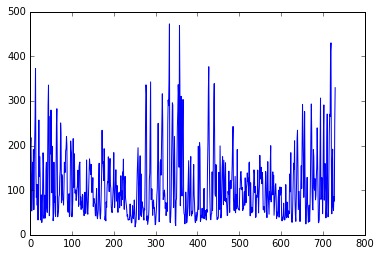

In [210]:
print_stats('北京', 'AQI', 100)

city = 天津, type = AQI, median = 86.76, mean = 102.87, ratio = 0.3932


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


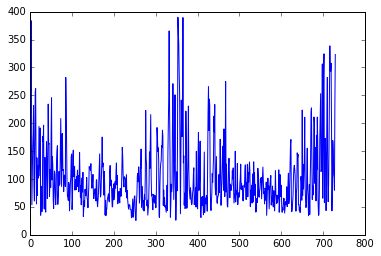

In [211]:
print_stats('天津', 'AQI', 100)

city = 杭州, type = AQI, median = 69.35, mean = 76.16, ratio = 0.1959


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


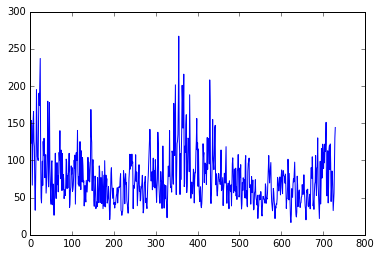

In [212]:
print_stats('杭州', 'AQI', 100)

city = 广州, type = AQI, median = 50.81, mean = 55.56, ratio = 0.0492


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


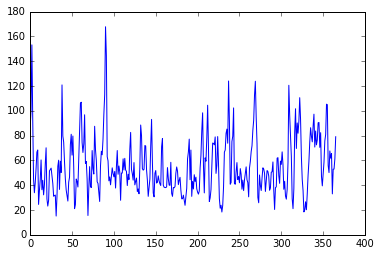

In [190]:
print_stats('广州', 'AQI', 100)

city = 深圳, type = AQI, median = 43.56, mean = 46.93, ratio = 0.0110


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


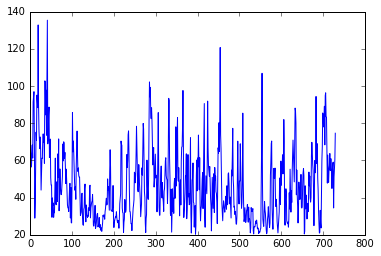

In [213]:
print_stats('深圳', 'AQI', 100)